# ANALYSING SAKILA DATABASE PROJECT

## Author(s): Nfayem Imoro

The program performs exploratory data analysis on the Sakila database in MySQL, using pandas and SQL query, to produce a report that shows trends and insights gleaned from the following questions:
1. Determine how much we made from revenue for active and inactive members. Visualise the result as a bar chart
2. Determine which of the two staff members, Mike and Jon, contributed the most to our revenue in August 2005. Visualise their percentage contribution as a pie chart.
3. Create a simple line chart showing the monthly rental count of the store.
4. Create a basic bar chart to show the monthly revenue for the rental store.

### Import relevant libraries and establish connection to the Sakila Database

In [8]:
# Importing necessary libraries
from dotenv import load_dotenv
import os
import sqlalchemy as sa
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)

# Load environment variables from .env file
load_dotenv("Sakiladb.env")

# Retrieve environment variables for database connection
username = os.getenv("USER")
host = os.getenv("HOST")
password = os.getenv("PASSWORD")
database_name = os.getenv("DATABASE_NAME")

# Create a database connection string using SQLAlchemy
connection = sa.create_engine(f"mysql://{username}:{password}@{host}/{database_name}")

# Print the database connection string
print()
print(connection)
print()

ImportError: cannot import name 'load_dotenv' from 'dotenv' (c:\Users\Nfayem\OneDrive\Azubi_Africa\GitHub\git-and-github-final-assignment-Nfayem\venv\lib\site-packages\dotenv\__init__.py)

### Show all tables in the Sakila Database

In [22]:
# Define the SQL query to show all tables in the database
db_query = """
        SHOW TABLES;
        """

# Read data from the SQL query result into a DataFrame using the established database connection
tbl_df = pd.read_sql(db_query, connection)

# Display the DataFrame containing the list of tables in the database
tbl_df

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


### 1. Determine how much we made from revenue for active and inactive members. Visualise the result as a bar chart

#### Step 1: Calculate revenue generated from active and inactive members

In [23]:
# Define SQL query to retrieve data
db_query1 = """
        SELECT customer_id, CONCAT(first_name, ' ', last_name) AS full_name, active, amount
        FROM customer
        JOIN payment USING (customer_id);
        """

# Read data from the SQL query result into a DataFrame using the established database connection
cust_df = pd.read_sql(db_query1, connection)

# Define a dictionary to map values of the 'active' column to corresponding activity labels
act_inact_map = {1: "Active", 0: "Inactive"}

# Create a new column 'activity' in the DataFrame and fill it with NaN values
cust_df["activity"] = np.nan

# Replace NaN values in the 'activity' column with corresponding activity labels based on the 'active' column
cust_df["activity"] = cust_df["activity"].fillna(cust_df["active"].map(act_inact_map))

# Group the DataFrame by 'activity' and calculate the total revenue for each activity
revenue_per_activity = cust_df.groupby("activity")["amount"].sum().reset_index()

# Create a copy of the DataFrame and format the 'amount' column to display revenue in currency format
revenue_per_activity_formatted = revenue_per_activity.copy()
revenue_per_activity_formatted["amount"] = revenue_per_activity_formatted["amount"].apply(lambda x: "${:,.2f}".format(x))

# Print the formatted DataFrame showing revenue generated from both active and inactive customers
print()
print("The revenue generated from both active and inactive customers is:")
print()
revenue_per_activity_formatted


The revenue generated from both active and inactive customers is:



,activity,amount
0,Active,"$65,746.60"
1,Inactive,"$1,659.96"


#### Step 2: Visualise the result as a bar chart


**********  A BARPLOT TO COMPARE THE REVENUE GENERATED FROM ACTIVE CUSTOMERS TO INACTIVE CUSTOMERS  **********



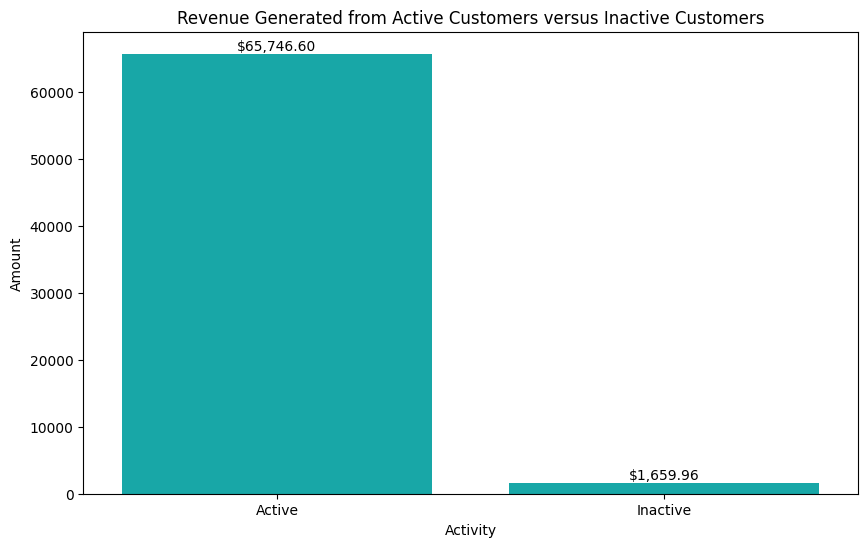


Observation:

The bar plot indicates more revenue was generated from active customers compared to inactive customers.



In [24]:
# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a barplot to compare revenue generated from active and inactive customers
sns.barplot(data=revenue_per_activity, x="activity", y="amount", color="c")

# Set labels for the x-axis and y-axis
plt.xlabel("Activity")
plt.ylabel("Amount")

# Set the title of the plot
plt.title("Revenue Generated from Active Customers versus Inactive Customers")

# Annotate each bar with its corresponding revenue value
for index, row in revenue_per_activity.iterrows():
    # Place the annotation at the center of each bar, aligned to the bottom
    plt.text(index, row["amount"], f"${row['amount']:,.2f}", ha="center", va="bottom")

# Print a message indicating the purpose of the plot
print()
print("**********  A BARPLOT TO COMPARE THE REVENUE GENERATED FROM ACTIVE CUSTOMERS TO INACTIVE CUSTOMERS  **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the bar plot
print()
print("Observation:")
print()
print("The bar plot indicates more revenue was generated from active customers compared to inactive customers.")
print()

### 2. Determine which of the two staff members, Mike and Jon, contributed the most to our revenue in August 2005. Visualise their percentage contribution as a pie chart.

#### Step 1: Calculate revenue generated by each staff member

In [25]:
# Define SQL query to retrieve data
db_query2 = """
    SELECT staff_id, CONCAT(first_name, ' ', last_name) AS full_name, active, amount, payment_date
    FROM staff
    JOIN payment USING(staff_id)
    WHERE MONTH(payment_date) = 8 AND YEAR(payment_date) = 2005;
"""

# Read data from the SQL query result into a DataFrame using the established database connection
stf_df = pd.read_sql(db_query2, connection)

# Group the DataFrame by staff names and calculate the total revenue generated by each staff member
revenue_per_staff = stf_df.groupby("full_name")["amount"].sum().reset_index()

# Calculate the total revenue generated overall
total_revenue = revenue_per_staff["amount"].sum()

# Calculate the percentage contribution of each staff member to the total revenue
revenue_per_staff["percentage_contribution"] = (revenue_per_staff["amount"] / total_revenue) * 100

# Identify the staff member who contributed the most to revenue
most_revenue_per_staff = revenue_per_staff.head(1)

# Create a copy of the DataFrame with formatted revenue and percentage contribution
revenue_per_staff_formatted = revenue_per_staff.copy()
revenue_per_staff_formatted["amount"] = revenue_per_staff_formatted["amount"].apply(lambda x: "${:,.2f}".format(x))
revenue_per_staff_formatted["percentage_contribution"] = revenue_per_staff_formatted["percentage_contribution"].apply(lambda x: "{:.2f}%".format(x))

# Print the staff member who contributed the most and their percentage contribution
print()
print(f"{most_revenue_per_staff['full_name'].iloc[0]} contributed the most revenue generated in August 2005 with a percentage contribution of {most_revenue_per_staff['percentage_contribution'].iloc[0]:.2f}%.")
print()

# Print the revenue generated by each staff member in August 2005
print("The revenue generated by each staff member in August 2005 is:")
print()
revenue_per_staff_formatted


Jon Stephens contributed the most revenue generated in August 2005 with a percentage contribution of 50.75%.

The revenue generated by each staff member in August 2005 is:



,full_name,amount,percentage_contribution
0,Jon Stephens,"$12,216.49",50.75%
1,Mike Hillyer,"$11,853.65",49.25%


#### Step 2: Visualise their percentage contribution as a pie chart


**********  A PIE CHART TO SHOW THE PERCENTAGE CONTRIBUTION OF REVENUE GENERATED BY STAFF MEMBERS  **********



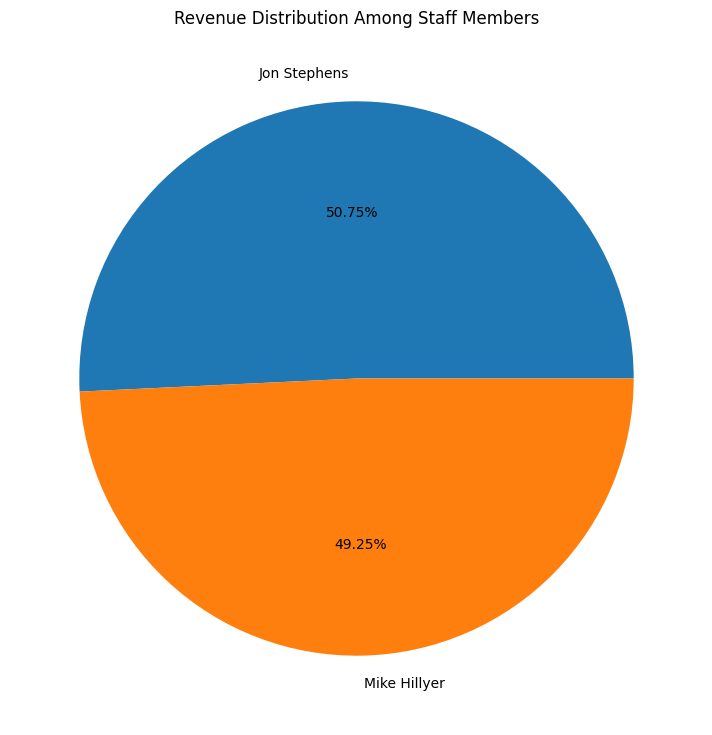


Observation:

The pie chart indicates more revenue was generated by Jon Stephens compared to Mike Hillyer.



In [26]:
# Define the dimensions of the pie chart plot
plt.figure(figsize=(15, 9))

# Create a pie chart showing the distribution of revenue among staff members
plt.pie(revenue_per_staff["amount"], labels=revenue_per_staff["full_name"], autopct="%2.2f%%")

# Set the title of the pie chart
plt.title("Revenue Distribution Among Staff Members")

# Print a message indicating the purpose of the pie chart
print()
print("**********  A PIE CHART TO SHOW THE PERCENTAGE CONTRIBUTION OF REVENUE GENERATED BY STAFF MEMBERS  **********")
print()

# Display the pie chart
plt.show()

# Print a message indicating the observation made from analyzing the pie chart
print()
print("Observation:")
print()
print("The pie chart indicates more revenue was generated by Jon Stephens compared to Mike Hillyer.")
print()

### 3. Create a simple line chart showing the monthly rental count of the store

#### Step 1: Calculate the rental count for each month

In [27]:
# Define SQL query to retrieve data
db_query3 = '''
    SELECT rental_id, rental_date
    FROM rental;
'''

# Read data from the SQL query result into a DataFrame using the established database connection
rntc_df = pd.read_sql(db_query3, connection)

# Extract the month and year from the 'rental_date' column using datetime functions
rntc_df["month"] = rntc_df["rental_date"].dt.month
rntc_df["year"] = rntc_df["rental_date"].dt.year

# Group by month and year, then calculate the total rental count for each month
monthly_rental = rntc_df.groupby(["month", "year"])["rental_id"].count().reset_index()

# Map month numbers to month names for better readability
monthly_rental["month"] = monthly_rental["month"].map(lambda x: calendar.month_name[x])

# Sort the DataFrame by year for chronological ordering
monthly_rental.sort_values(by="year", inplace=True, ignore_index=True)

# Create a new column 'period' combining month name and year for easier interpretation
monthly_rental["period"] = monthly_rental["month"] + " " + monthly_rental["year"].astype(str)

# Print a message indicating the purpose of the data
print()
print("The total rental count for each month is:")
print()

# Display the DataFrame showing the total rental count for each month
monthly_rental


The total rental count for each month is:



,month,year,rental_id,period
0,May,2005,1156,May 2005
1,June,2005,2311,June 2005
2,July,2005,6709,July 2005
3,August,2005,5686,August 2005
4,February,2006,182,February 2006


#### Step 2: Visualise the result as a line chart


**********  A LINE CHART TO SHOW THE RENTAL COUNT FOR EACH MONTH WITHIN THE PERIOD  **********



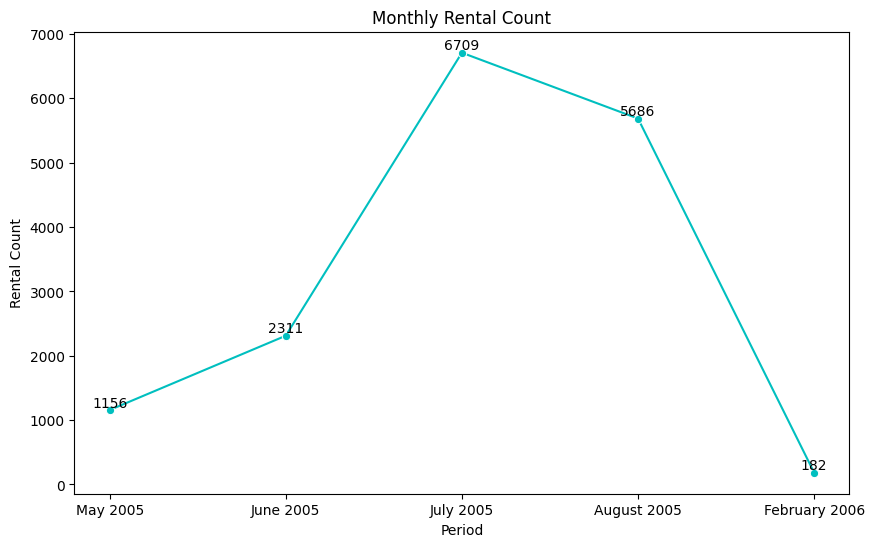


Observation:

The line plot indicates the highest count of movies rented was in July 2005 and the least was in February 2006.



In [28]:
# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a line plot of the monthly rental count
sns.lineplot(data=monthly_rental, x="period", y="rental_id", marker="o", color="c")

# Define the label of the abscissa (x-axis)
plt.xlabel("Period")

# Define the label of the ordinate (y-axis)
plt.ylabel("Rental Count")

# Define the title of the plot
plt.title("Monthly Rental Count")

# Annotate each point with its value
for index, row in monthly_rental.iterrows():
    plt.text(index, row["rental_id"], str(row["rental_id"]), ha="center", va="bottom")

# Print a message indicating the purpose of the plot
print()
print("**********  A LINE CHART TO SHOW THE RENTAL COUNT FOR EACH MONTH WITHIN THE PERIOD  **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the line plot
print()
print("Observation:")
print()
print("The line plot indicates the highest count of movies rented was in July 2005 and the least was in February 2006.")
print()

### 4. Create a basic bar chart to show the monthly revenue for the rental store

#### Step 1: Calculate the total revenue per each month

In [29]:
# Define SQL query to retrieve data
db_query4 = '''
        SELECT rental_id, rental_date, payment_date, amount
        FROM rental
        JOIN payment USING(rental_id);
        '''

# Read data from the SQL query result into a DataFrame using the established database connection
rntr_df = pd.read_sql(db_query4, connection)

# Extract the month and year from the 'rental_date' column using datetime functions
rntr_df["month"] = rntr_df["rental_date"].dt.month
rntr_df["year"] = rntr_df["rental_date"].dt.year

# Group by month and year, then calculate the total rental revenue for each month
monthly_revenue = rntr_df.groupby(["month", "year"])["amount"].sum().reset_index()

# Map month numbers to month names for better readability
monthly_revenue["month"] = monthly_revenue["month"].map(lambda x: calendar.month_name[x])

# Sort the DataFrame by year for chronological ordering
monthly_revenue.sort_values(by="year", inplace=True, ignore_index=True)

# Create a new column 'period' combining month name and year for easier interpretation
monthly_revenue["period"] = monthly_revenue["month"] + " " + monthly_revenue["year"].astype(str)

# Create a copy of the DataFrame with formatted revenue
monthly_revenue_formatted = monthly_revenue.copy()
monthly_revenue_formatted["amount"] = monthly_revenue_formatted["amount"].apply(lambda x: "${:,.2f}".format(x))

# Print a message indicating the purpose of the output
print()
print("The total revenue for each month over time is:")
print()

# Print the total revenue for each month with formatted values
monthly_revenue_formatted


The total revenue for each month over time is:



,month,year,amount,period
0,May,2005,"$4,823.44",May 2005
1,June,2005,"$9,629.89",June 2005
2,July,2005,"$28,368.91",July 2005
3,August,2005,"$24,070.14",August 2005
4,February,2006,$514.18,February 2006


#### Step 2: Visualise the results as a bar chart


**********  A BAR CHART TO SHOW THE MONTHLY REVENUE OVER TIME   **********



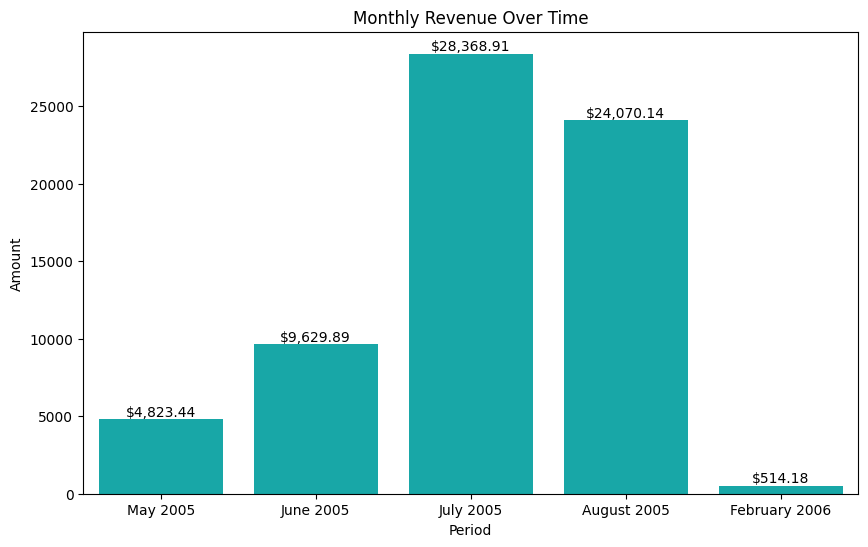


Observation:

The bar plot indicates the highest revenue generated was in July 2005 and the least was in February 2006.



In [30]:
# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to compare revenue generated from active and inactive customers
sns.barplot(data=monthly_revenue, x="period", y="amount", color="c")

# Set labels for the x-axis and y-axis
plt.xlabel("Period")
plt.ylabel("Amount")

# Set the title of the plot
plt.title("Monthly Revenue Over Time")

# Annotate each bar with its corresponding revenue value
for index, row in monthly_revenue.iterrows():
    # Place the annotation at the top of each bar, aligned to the center
    plt.text(index, row["amount"], f"${row['amount']:,.2f}", ha="center", va="bottom")

# Print a message indicating the purpose of the plot
print()
print("**********  A BAR CHART TO SHOW THE MONTHLY REVENUE OVER TIME   **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the bar plot
print()
print("Observation:")
print()
print("The bar plot indicates the highest revenue generated was in July 2005 and the least was in February 2006.")
print()